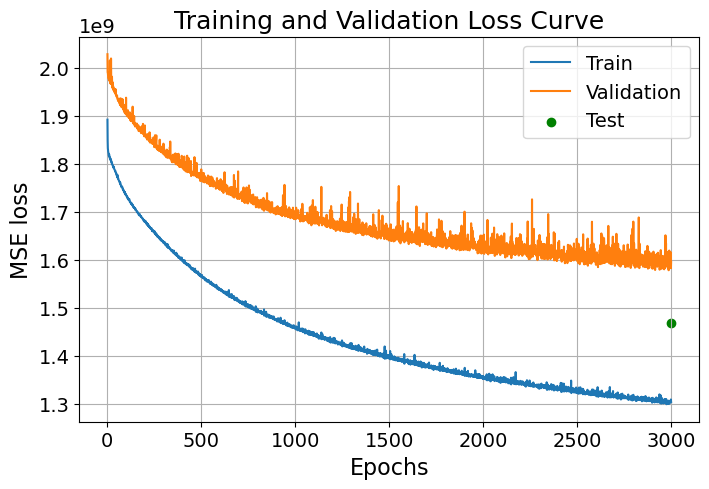

In [6]:
import numpy as np
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from cmcrameri import cm
import numpy as np
import matplotlib as mpl

mpl.rcParams.update({
    "font.size": 16,          # base size
    "axes.titlesize": 18,
    "axes.labelsize": 16,
    "xtick.labelsize": 14,
    "ytick.labelsize": 14,
    "legend.fontsize": 14,
    "figure.titlesize": 20,
})

file = "srcnn.csv"
fig = plt.figure(figsize=(8,5))
data = np.loadtxt(file, delimiter=",")

epochs = np.arange(1, 3001, 1)
plt.plot(epochs, data[:, 0], label = "Train")
plt.plot(epochs, data[:,1], label = "Validation")
plt.scatter(3000, 1467608716.8, label = "Test", c ="green")
plt.xlabel("Epochs")
plt.ylabel("MSE loss")
plt.title('Training and Validation Loss Curve')

plt.grid()
plt.legend()
plt.savefig('losscurve.png', dpi = 150)
plt.show()


(954, 50, 50)
(954, 50, 50)
(954, 1, 50, 50)
(954, 50, 50)


/var/folders/b2/4zv441n11_s6ww9psppcn0s80000gn/T/ipykernel_57224/1485077744.py:57: RuntimeWarning: divide by zero encountered in log10
  sc = ax.pcolormesh(lon_e_edges, lat_e_edges, np.log10(eagrid[idx]),
/var/folders/b2/4zv441n11_s6ww9psppcn0s80000gn/T/ipykernel_57224/1485077744.py:72: RuntimeWarning: invalid value encountered in log10
  sc = ax.pcolormesh(lon_e_edges, lat_e_edges, np.log10(np.squeeze(output[idx])),
/var/folders/b2/4zv441n11_s6ww9psppcn0s80000gn/T/ipykernel_57224/1485077744.py:87: RuntimeWarning: divide by zero encountered in log10
  sc = ax.pcolormesh(lon_e_edges, lat_e_edges, np.log10(bili[idx]),


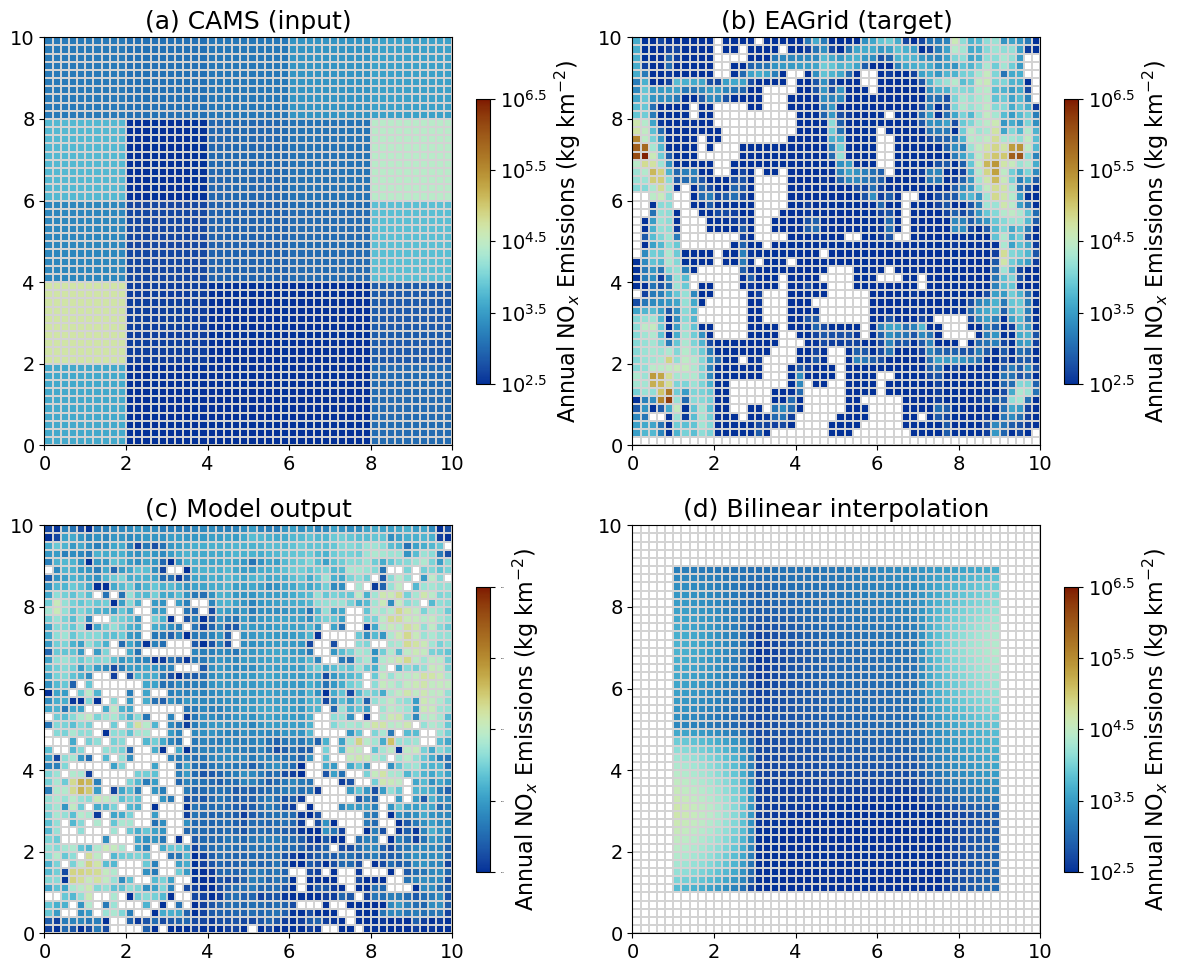

In [ ]:
camsfile = "input_cams_test.npy"
eagridfile = "ground_truth_test.npy"
outputfile = "SRCNN_output_test.npy"
bilifile  = "bilinear_test.npy"

cams = np.load(camsfile)
eagrid = np.load(eagridfile)
output = np.load(outputfile)
bili = np.load(bilifile)

print(np.shape(cams))
print(np.shape(eagrid))
print(np.shape(output))
print(np.shape(bili))

idx = 150

mpl.rcParams.update({
    "font.size": 16,          # base size
    "axes.titlesize": 18,
    "axes.labelsize": 16,
    "xtick.labelsize": 14,
    "ytick.labelsize": 14,
    "legend.fontsize": 14,
    "figure.titlesize": 20,
})
log_ticks = np.arange(2.5, 6.6, 1.0)  # 2.5, 3.5, ..., 6.5
tick_labels = [rf"$10^{{{t:.1f}}}$" for t in log_ticks]


# lon/latのエッジ（例）
lon_e_edges = np.linspace(0, 10, 51)
lat_e_edges = np.linspace(0, 10, 51)

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# 描画設定
cmap = cm.roma_r
norm = mcolors.Normalize(vmin=2.5, vmax=6.5)

# === 左上: cams =====================================
ax = axes[0, 0]
sc = ax.pcolormesh(lon_e_edges, lat_e_edges, np.log10(cams[idx]),
                   cmap=cmap, norm=norm,
                   edgecolors='lightgray', linewidth=0.2)
ax.set(xlim=[lon_e_edges[0], lon_e_edges[-1]], ylim=[lat_e_edges[0], lat_e_edges[-1]])
cb = plt.colorbar(sc, ax=ax, shrink=0.7, aspect=20, fraction=0.046)
ax.set_aspect('equal')
cb.set_ticks(log_ticks)
cb.set_ticklabels(tick_labels)
#cb.ax.tick_params(labelsize=7)
cb.set_label(r'Annual NO$_x$ Emissions (kg km$^{-2}$)')
ax.set_title('(a) CAMS (input)')

# == 右上: eagrid ======================================
ax = axes[0, 1]
sc = ax.pcolormesh(lon_e_edges, lat_e_edges, np.log10(eagrid[idx]),
                   cmap=cmap, norm=norm,
                   edgecolors='lightgray', linewidth=0.2)
ax.set(xlim=[lon_e_edges[0], lon_e_edges[-1]], ylim=[lat_e_edges[0], lat_e_edges[-1]])
cb = plt.colorbar(sc, ax=ax, shrink=0.7, aspect=20, fraction=0.046)
#cb.ax.tick_params(labelsize=7)
ax.set_aspect('equal')
cb.set_ticks(log_ticks)
cb.set_ticklabels(tick_labels)
#cb.ax.tick_params(labelsize=7)
cb.set_label(r'Annual NO$_x$ Emissions (kg km$^{-2}$)')
ax.set_title('(b) EAGrid (target)')

# ==  左下: output (squeeze) ================================
ax = axes[1, 0]
sc = ax.pcolormesh(lon_e_edges, lat_e_edges, np.log10(np.squeeze(output[idx])),
                   cmap=cmap, norm=norm,
                   edgecolors='lightgray', linewidth=0.2)
ax.set(xlim=[lon_e_edges[0], lon_e_edges[-1]], ylim=[lat_e_edges[0], lat_e_edges[-1]])
cb = plt.colorbar(sc, ax=ax, shrink=0.7, aspect=20, fraction=0.046)
#cb.ax.tick_params(labelsize=7)
ax.set_aspect('equal')
cb.set_ticks(log_ticks)
cb.set_ticklabels(tick_labels)
cb.set_label(r'Annual NO$_x$ Emissions (kg km$^{-2}$)')
ax.set_title('(c) Model output')

# == 右下: bili =============================================
ax = axes[1, 1]
sc = ax.pcolormesh(lon_e_edges, lat_e_edges, np.log10(bili[idx]),
                   cmap=cmap, norm=norm,
                   edgecolors='lightgray', linewidth=0.2)
ax.set(xlim=[lon_e_edges[0], lon_e_edges[-1]], ylim=[lat_e_edges[0], lat_e_edges[-1]])
cb = plt.colorbar(sc, ax=ax, shrink=0.7, aspect=20, fraction=0.046)
#cb.ax.tick_params(labelsize=7)
ax.set_title('(d) Bilinear interpolation')
ax.set_aspect('equal')
cb.set_ticks(log_ticks)
cb.set_ticklabels(tick_labels)
#cb.ax.tick_params(labelsize=7)
cb.set_label(r'Annual NO$_x$ Emissions (kg km$^{-2}$)')
plt.tight_layout()
plt.show()

